# Importing neccessary libraries

In [38]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Displaying Uninfected and Infected Cell tissues

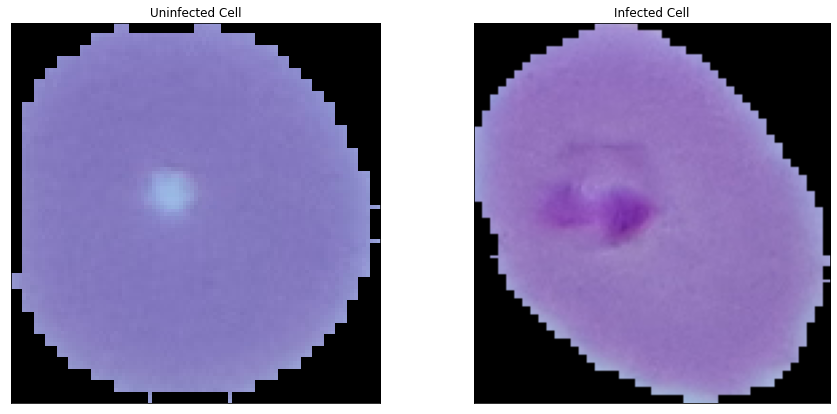

In [40]:
import cv2

upic='./dataset_malaria/cell_images/cell_image_focus/1_Uninfected/C57P18thinF_IMG_20150729_104027_cell_92.png'
apic='./dataset_malaria/cell_images/cell_image_focus/2_Parasitized/C59P20thinF_IMG_20150803_112802_cell_170.png'
#D:/Kuliah/Kulon/Skripsi/Dataset/archive(12)/dataset_malaria/cell_images/cell_image_focus
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [41]:
width = 128
height = 128

In [42]:
seed_value = 1000
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Dividing Dataset into two folders train and test

In [43]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Preparing train and test Image Generator

In [44]:
trainDatagen = datagen.flow_from_directory(directory='dataset_malaria/cell_images/cell_image_focus/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 10,
                                           seed=seed_value,
                                           subset='training')

Found 1600 images belonging to 2 classes.


In [7]:
#X_train, y_train = next(trainDatagen)

In [46]:
valDatagen = datagen.flow_from_directory(directory='dataset_malaria/cell_images/cell_image_focus/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 400,
                                           seed=seed_value,
                                           subset='validation', shuffle=False)

Found 400 images belonging to 2 classes.


In [47]:
y_train = trainDatagen.classes
X_train = trainDatagen.filenames

In [48]:
y_val = valDatagen.classes
X_val = valDatagen.filenames

In [51]:
X_val = valDatagen.next()[0]

In [52]:
X_val.shape

(400, 128, 128, 3)

In [53]:
num_val_samples = len(valDatagen)
X_val = []
for i in range(num_val_samples):
    batch_x = valDatagen.next()[0]
    X_val.append(batch_x)

In [54]:
X_val = np.concatenate(X_val)

In [55]:
print(trainDatagen.class_indices)
print(valDatagen.class_indices)

{'1_Uninfected': 0, '2_Parasitized': 1}
{'1_Uninfected': 0, '2_Parasitized': 1}


# Preparing the model

In [56]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Conv2D(20,(2,2),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(3,3))
model.add(Dropout(0.2))

model.add(Conv2D(20,(2,2),activation='relu'))
model.add(MaxPool2D(3,3))
model.add(Dropout(0.1))

model.add(Conv2D(20,(2,2),activation='relu'))
model.add(MaxPool2D(3,3))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

#model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.5))

#model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.5))

#model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 20)      260       
                                                                 
 max_pooling2d (MaxPooling2  (None, 42, 42, 20)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 42, 42, 20)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 41, 41, 20)        1620      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 20)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 20)        0

In [58]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
#early_stop = EarlyStopping(monitor='val_loss',patience=2,min_delta=0.001)

In [60]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =50,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen))

Epoch 1/50


<ipython-input-60-b99cfa0f9306>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = trainDatagen,


160/160 [==============================] - 22s 130ms/step - loss: 0.7040 - accuracy: 0.5088 - val_loss: 0.6863 - val_accuracy: 0.6575
Epoch 2/50
160/160 [==============================] - 5s 31ms/step - loss: 0.6851 - accuracy: 0.5531 - val_loss: 0.6711 - val_accuracy: 0.5000
Epoch 3/50
160/160 [==============================] - 5s 33ms/step - loss: 0.6169 - accuracy: 0.6494 - val_loss: 0.5542 - val_accuracy: 0.7925
Epoch 4/50
160/160 [==============================] - 5s 31ms/step - loss: 0.5470 - accuracy: 0.7006 - val_loss: 0.5301 - val_accuracy: 0.7725
Epoch 5/50
160/160 [==============================] - 5s 31ms/step - loss: 0.4563 - accuracy: 0.7669 - val_loss: 0.7405 - val_accuracy: 0.6750
Epoch 6/50
160/160 [==============================] - 5s 31ms/step - loss: 0.3292 - accuracy: 0.8637 - val_loss: 2.6452 - val_accuracy: 0.6375
Epoch 7/50
160/160 [==============================] - 5s 32ms/step - loss: 0.2889 - accuracy: 0.8913 - val_loss: 1.9457 - val_accuracy: 0.6350
Epoch 8/

# Plot

In [61]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

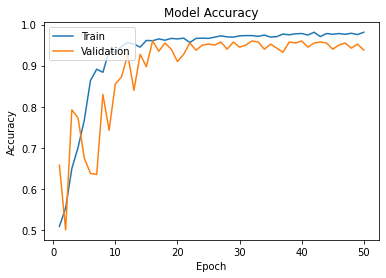

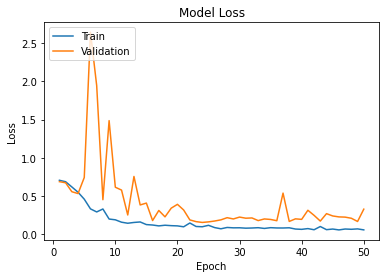

In [62]:
plotLearningCurve(history,50)

In [63]:
history.history

{'loss': [0.7040135264396667,
  0.6851493120193481,
  0.6168878674507141,
  0.5470392107963562,
  0.45625412464141846,
  0.3291744589805603,
  0.28891780972480774,
  0.32772886753082275,
  0.19593706727027893,
  0.1858600378036499,
  0.15456412732601166,
  0.14084288477897644,
  0.1512279063463211,
  0.15765328705310822,
  0.1231972947716713,
  0.11751502007246017,
  0.10606345534324646,
  0.11470070481300354,
  0.10912922024726868,
  0.10615219175815582,
  0.09425009787082672,
  0.14400653541088104,
  0.09832713007926941,
  0.09468722343444824,
  0.11365494877099991,
  0.08372703194618225,
  0.06810048222541809,
  0.08541693538427353,
  0.08058446645736694,
  0.08131980150938034,
  0.07608751952648163,
  0.07835639268159866,
  0.08230222016572952,
  0.07275421917438507,
  0.08266560733318329,
  0.07881122827529907,
  0.07844481617212296,
  0.08118435740470886,
  0.06480321288108826,
  0.06084083393216133,
  0.07057549804449081,
  0.05570939928293228,
  0.09785052388906479,
  0.0565761

# Hasil Evaluasi

In [64]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3253110647201538
Test accuracy: 0.9375


In [65]:
from sklearn.metrics import classification_report

In [66]:
y_pred = model.predict(X_val)

13/13 [==============================] - 0s 17ms/step


In [67]:
#y_pred = model.predict_generator(valDatagen, steps=len(valDatagen))

In [68]:
y_pred_labels = (y_pred > 0.5).astype(int)

In [69]:
y_true = valDatagen.classes

In [70]:
cm = confusion_matrix(y_true, y_pred_labels)

In [71]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[200   0]
 [ 25 175]]


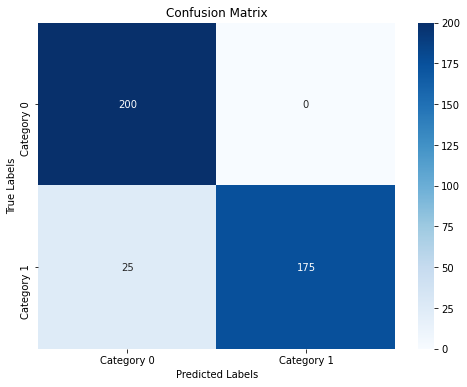

In [72]:
class_labels = ["Category 0", "Category 1"]

# Plot the confusion matrix as a heatmap with colors
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [73]:
print(classification_report(y_true, y_pred_labels))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       200
           1       1.00      0.88      0.93       200

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



# Simpan Model

In [74]:
# Save the CNN model architecture to JSON format
model_json = model.to_json()
with open('my_model80.json', 'w') as json_file:
    json_file.write(model_json)

# Save the CNN model weights to H5 format
model.save_weights('my_model80.h5')

# Load Model

In [75]:
# Load the CNN model from JSON and H5 files
from keras.models import model_from_json
with open('my_model80.json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('my_model80.h5')

# Test Image (Validation)

In [76]:
import matplotlib.pyplot as plt

In [78]:
image_path = "./dataset_malaria/cell_images/Data_Validasi/MALARIA_01.png"

In [79]:
image = cv2.imread(image_path)

In [80]:
target_size = (128, 128)

In [81]:
image_resized = cv2.resize(image, target_size)

In [82]:
image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

In [83]:
#cv2.imshow('Resized Image', image_rgb)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [84]:
image_array = np.array(image_rgb)

In [85]:
image_array_normalized = image_array / 255.0

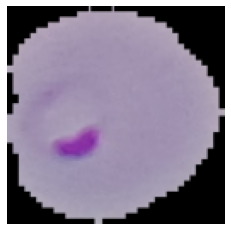

In [86]:
plt.imshow(image_array_normalized)
plt.axis('off')
plt.show()

In [87]:
input_data = np.expand_dims(image_array_normalized, axis=0)

# Test Data (Quick Output)

In [88]:
predictions = loaded_model.predict(input_data)

1/1 [==============================] - 0s 69ms/step


In [89]:
predicted_class = (predictions[0] > 0.5).astype(int)

In [90]:
predictions

array([[1.]], dtype=float32)

In [91]:
print("Predicted Class:", predicted_class)

Predicted Class: [1]
